In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('../bank-additional-full.csv', sep=';')

X = df.drop('y', axis=1)
#target mapping
y = df['y'].map({'yes': 1, 'no': 0})

#finding categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Numeric columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [3]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [4]:
lgbm = LGBMClassifier(random_state=1)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgbm)
])


In [5]:
param_grid = { #hyper parameter grid for grid search
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1, 10, 20],
    'model__learning_rate': [0.05, 0.1],
    'model__num_leaves': [31, 50],
    'model__min_child_samples': [20, 50]
}

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

In [7]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

#print("\nBest parameters found:", grid_search.best_params_)

#best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info]

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/valida

[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.3s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.5s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.3s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.6s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026669 secon

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  11.6s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  11.5s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  11.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] Auto-choosing row-wise multi-threa

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.5s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014251 seconds.
You can set `force_row_wise=tr

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  14.0s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.2s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.1s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.4s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  16.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  16.2s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  16.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.5s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  20.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.0s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.6s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  13.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   6.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   6.0s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   4.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.2s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.1s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  20.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   7.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  16.6s
[CV] END model__learning_rate=0.05, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  16.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   8.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   8.8s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   8.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   8.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=   9.9s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  14.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  14.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.3s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   4.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  13.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total tim

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   6.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   6.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   7.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  11.2s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  17.4s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total tim

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points 

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  17.2s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  16.7s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   7.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total tim

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  17.0s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  10.3s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  10.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  10.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   8.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  10.1s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  11.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=   9.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=   9.5s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=   9.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.8s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.7s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  15.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   7.0s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  17.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   7.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  18.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  10.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  10.9s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  28.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  28.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  31.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  31.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  30.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  32.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  30.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  30.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   8.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  20.0s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   8.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  20.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  13.0s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  21.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  13.8s
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  13.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  11.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  11.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  13.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  13.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  14.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  17.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  16.0s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   9.1s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=  10.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=  11.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  27.5s
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  27.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   9.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  31.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   8.5s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  28.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  29.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  13.2s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  13.1s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  13.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  14.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  13.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  15.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  15.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  14.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  13.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.5s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   5.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.2s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   6.5s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  19.0s
[CV] END model__learning_rate=0.1, model__max_depth=-1, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  18.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020047 seconds.
You can set `force_row_wise=true

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_c

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  13.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  13.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  15.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  13.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; 

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.3s
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   6.6s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013574 seconds.
You can set `force_row_wise=true

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   6.2s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  17.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   7.1s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  17.4s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_c

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   8.9s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.1s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  14.2s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  14.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  21.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   8.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009477 seconds.
You can set `force_row_wise=true` to remove 

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  21.9s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  23.4s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=31; total time=   9.0s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  22.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  12.0s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  12.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  12.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[CV] END model__learning_rate=0.1, model__max_depth=10, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  26.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  10.6s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=100, model__num_leaves=50; total time=  10.7s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  12.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  12.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  12.5s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  12.4s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=31; total time=  12.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   5.5s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   6.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  18.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.0s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  18.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   6.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=31; total time=   6.8s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  19.2s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.9s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.8s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=   9.3s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=20, model__n_estimators=200, model__num_leaves=50; total time=  22.1s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  11.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=100, model__num_leaves=50; total time=  11.3s
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.4s
[LightGBM] [Info] Number of positive: 2969, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112633 -> initscore=-2.064126
[LightGBM] [Info] Start training from score -2.064126


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  12.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=31; total time=  11.9s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  14.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  11.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  14.6s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  14.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=20, model__min_child_samples=50, model__n_estimators=200, model__num_leaves=50; total time=  10.5s
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('model',
                                        LGBMClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [-1, 10, 20],
                         'model__min_child_samples': [20, 50],
                         'model__n_estimators': [100, 200],
                         'model__num_leaves': [31, 50]},
             scoring='accuracy', verbose=2)

In [8]:
print("Best parameters found:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters found: {'model__learning_rate': 0.05, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__n_estimators': 100, 'model__num_leaves': 31}

Accuracy: 0.9186695799951444

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.66      0.57      0.61       928

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238


Confusion Matrix:
 [[7043  267]
 [ 403  525]]


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



AUC: 0.9502057880088683


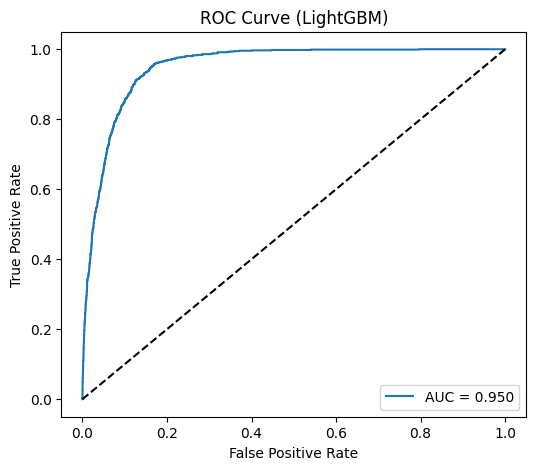

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("\nAUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
plt.legend()
plt.show()